In [1]:
import tensorflow as tf

In [2]:
## linspace exists in tf
x = tf.linspace(-3.0,3.0,100)
print(x)

Tensor("LinSpace:0", shape=(100,), dtype=float32)


The name of it is "LinSpace:0". Wherever we see this colon 0, that just means the output of. So the name of this Tensor is saying, the output of LinSpace.
Notice that unlike to numpy no values are printerd here. Instead this is merely a pointer to the ouput of a tf.Operation which has now been added to Tensorflow's default computational graph.

The result of this operation is the tensor that we are returned.

We can inspect the default graph by,

In [3]:
# Here we are taking a copy of the default graph
g = tf.get_default_graph()

In [4]:
# any operations or tensor can always be obtained from this graph
[op.name for op in g.get_operations()]


[u'LinSpace/start', u'LinSpace/stop', u'LinSpace/num', u'LinSpace']

In [5]:
g.get_collection(name='LinSpace/start')
# TODO read about collections

[]

For each operation we have first the parameters for that operation and then the operation which takes all of the parameters and creates an output for the linspace.

We can think about just like we do in linear algebra,

The space of operations forms a dual space for the vector space

In [6]:
g.get_tensor_by_name('LinSpace' + ':0')


<tf.Tensor 'LinSpace:0' shape=(100,) dtype=float32>

In [7]:
# We can always reset the graph by
[op.name for op in g.get_operations()]

[u'LinSpace/start', u'LinSpace/stop', u'LinSpace/num', u'LinSpace']

In [8]:
# We're first going to create a session:
sess = tf.Session()

# Now we tell our session to compute anything we've created in the tensorflow graph.
computed_x = sess.run(x)
print(computed_x)

# Alternatively, we could tell the previous Tensor to evaluate itself using this session:
computed_x = x.eval(session=sess)
print(computed_x)

# We can close the session after we're done like so:
sess.close()

[-3.         -2.939394   -2.87878799 -2.81818175 -2.75757575 -2.69696975
 -2.63636351 -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.33333325
 -2.27272725 -2.21212125 -2.15151501 -2.090909   -2.030303   -1.969697
 -1.90909088 -1.84848475 -1.78787875 -1.72727275 -1.66666663 -1.6060605
 -1.5454545  -1.4848485  -1.42424238 -1.36363626 -1.30303025 -1.24242425
 -1.18181813 -1.12121201 -1.060606   -1.         -0.939394   -0.87878776
 -0.81818175 -0.75757575 -0.69696951 -0.63636351 -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333325 -0.27272725 -0.21212101 -0.15151501
 -0.090909   -0.030303    0.030303    0.09090924  0.15151525  0.21212125
  0.27272749  0.33333349  0.3939395   0.4545455   0.5151515   0.57575774
  0.63636374  0.69696975  0.75757599  0.81818199  0.87878799  0.939394    1.
  1.060606    1.12121201  1.18181849  1.24242449  1.30303049  1.36363649
  1.4242425   1.4848485   1.5454545   1.60606098  1.66666698  1.72727299
  1.78787899  1.84848499  1.909091    1.969697    2

In [9]:
# Tells the session which graph we want to manage
sess = tf.Session(graph=g)
sess.close()

Just create a new graph to be explicit

In [10]:
sess = tf.InteractiveSession()
x.eval()

array([-3.        , -2.939394  , -2.87878799, -2.81818175, -2.75757575,
       -2.69696975, -2.63636351, -2.5757575 , -2.5151515 , -2.4545455 ,
       -2.3939395 , -2.33333325, -2.27272725, -2.21212125, -2.15151501,
       -2.090909  , -2.030303  , -1.969697  , -1.90909088, -1.84848475,
       -1.78787875, -1.72727275, -1.66666663, -1.6060605 , -1.5454545 ,
       -1.4848485 , -1.42424238, -1.36363626, -1.30303025, -1.24242425,
       -1.18181813, -1.12121201, -1.060606  , -1.        , -0.939394  ,
       -0.87878776, -0.81818175, -0.75757575, -0.69696951, -0.63636351,
       -0.5757575 , -0.5151515 , -0.4545455 , -0.39393926, -0.33333325,
       -0.27272725, -0.21212101, -0.15151501, -0.090909  , -0.030303  ,
        0.030303  ,  0.09090924,  0.15151525,  0.21212125,  0.27272749,
        0.33333349,  0.3939395 ,  0.4545455 ,  0.5151515 ,  0.57575774,
        0.63636374,  0.69696975,  0.75757599,  0.81818199,  0.87878799,
        0.939394  ,  1.        ,  1.060606  ,  1.12121201,  1.18

In [11]:
type(x.get_shape())

tensorflow.python.framework.tensor_shape.TensorShape

In [12]:
sh = x.get_shape()

In [13]:
sh.as_list()

[100]

Now let's have some fun!
Create a 1D Gaussian

In [14]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/mnt/data/tjonsson/pkgs/anaconda3/envs/Winter2017/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [15]:

# The 1 dimensional gaussian takes two parameters, the mean value, and the standard deviation, which is commonly denoted by the name sigma.
mean = 0.0
sigma = 1.0

# Don't worry about trying to learn or remember this formula.  
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * np.pi))))

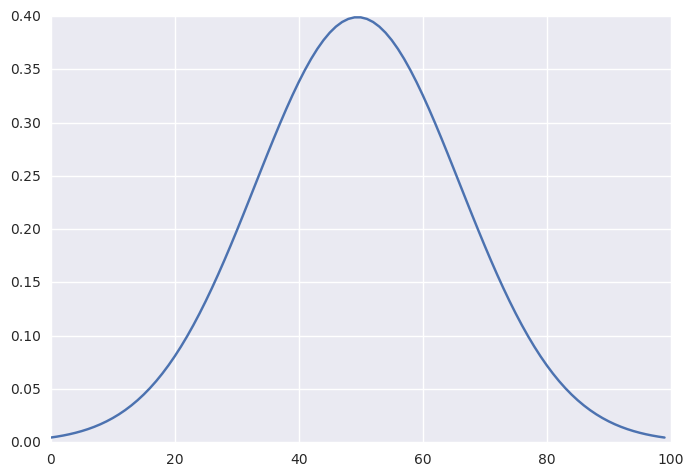

In [16]:
res = z.eval()

plt.plot(res)

In [ ]:
To get a k size Gaussian kernel of two dimension:

In [18]:
# Rember this is the linspace dimension
z.get_shape().as_list()

[100]

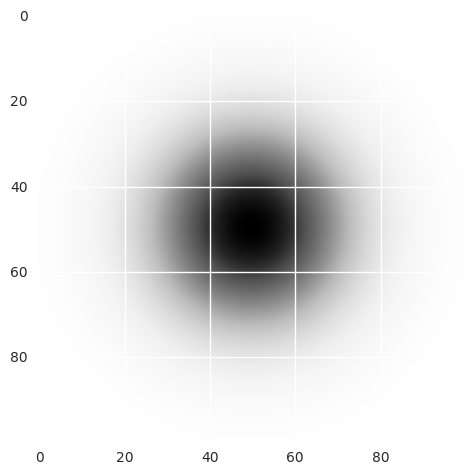

In [19]:
# Let's store the number of values in our Gaussian curve.
ksize = z.get_shape().as_list()[0]

# Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))

# Execute the graph
plt.imshow(z_2d.eval())

We would like to place Gaussians such as this one on body joint locations.

To do this we need first need to obtain a single example from the TFRecords representing the MPII dataset

In [23]:
from input_pipeline import setup_train_input_pipeline

In [35]:
data_dir = './train' # Path to tfrecords files
num_readers = 4 # number of threads to use for reading examples
input_queue_memory_factor = 16 # Factor which decides the number of minimum examples in RandomShuffleQueue
batch_size = 32 # Only for demonstration
num_preprocess_threads = 4 # number of preprocessing threads used
image_dim = 299 # Same number of pixels as in Bulat
with tf.Graph().as_default():
    with tf.device('/cpu:0'):
        example=setup_train_input_pipeline(data_dir,
                           num_readers,
                           input_queue_memory_factor,
                           batch_size,
                           num_preprocess_threads,
                           image_dim)

ValueError: Tensor conversion requested dtype float64 for Tensor with dtype int32: 'Tensor("batch_processing/div:0", shape=(3,), dtype=int32, device=/device:CPU:0)'